In [1]:
import pandas as pd
#import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [4]:
df_new = df.copy()
df_new['sex'] = df_new['sex'].map({'male':0 , 'female':1})
df_new['smoker'] = df_new['smoker'].map({'no':0, 'yes':1})
df_new = pd.get_dummies(df_new, columns=['region'], drop_first=True)


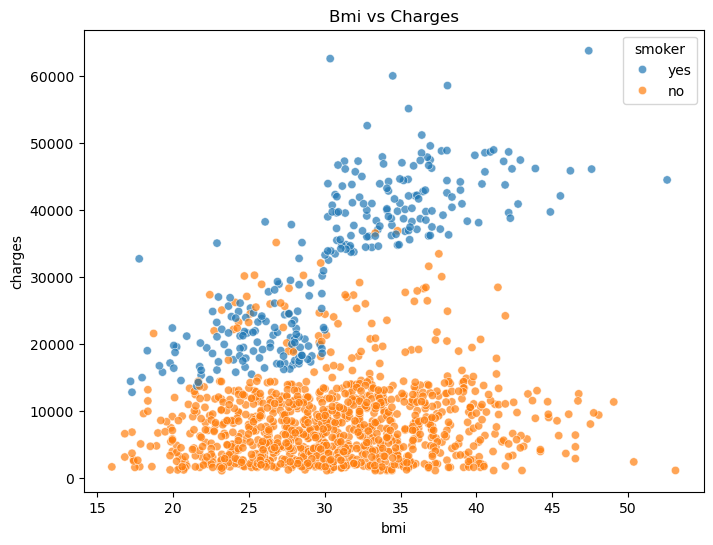

In [5]:
plt.figure(figsize=(8,6))
sb.scatterplot(
    data = df,
    x = 'bmi',
    y = 'charges',
    hue = 'smoker',
    alpha = 0.7
)
plt.title('Bmi vs Charges')
plt.show()

In [6]:
X = df_new.drop('charges',axis=1)
y = df_new['charges']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [7]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_train_pred_lr = linearRegressionModel.predict(X_train)
y_test_pred_lr = linearRegressionModel.predict(X_test)

rmse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
rmse_test_lr = mean_squared_error(y_test, y_test_pred_lr)

r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)


In [10]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [12]:
polyRegressionModel = LinearRegression()
polyRegressionModel.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_train_pred_poly = polyRegressionModel.predict(X_train_poly)
y_test_pred_poly = polyRegressionModel.predict(X_test_poly)

rmse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
rmse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)


In [14]:
results = pd.DataFrame({
    'Model': ['Degree 1', 'Degree 2'],
    'Train RMSE': [rmse_train_lr, rmse_train_poly],
    'Test RMSE': [rmse_test_lr, rmse_test_poly],
    'Train R2': [r2_train_lr, r2_train_poly],
    'Test R2': [r2_test_lr, r2_test_poly]
})

results


,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Degree 1,3.723748e+07,3.380685e+07,0.742004,0.782241
1,Degree 2,2.268419e+07,2.109074e+07,0.842835,0.864149


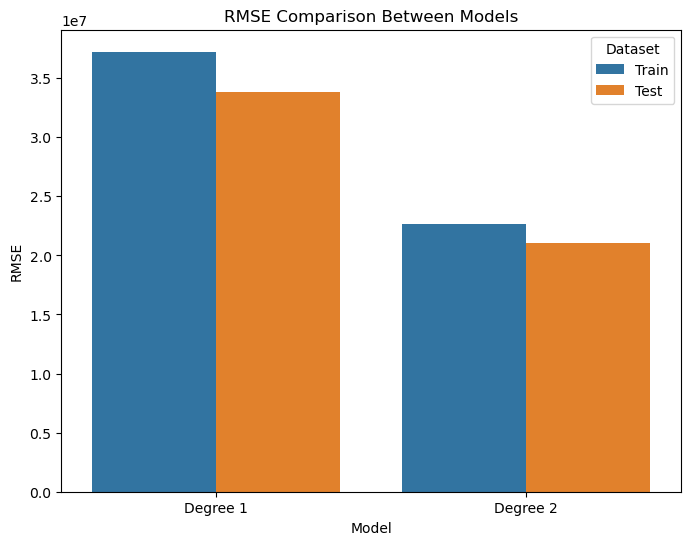

In [17]:
rmse_df = pd.DataFrame({
    'Model': ['Degree 1', 'Degree 1', 'Degree 2', 'Degree 2'],
    'Dataset': ['Train', 'Test', 'Train', 'Test'],
    'RMSE': [rmse_train_lr, rmse_test_lr, rmse_train_poly, rmse_test_poly]
})

plt.figure(figsize=(8, 6))
sb.barplot(data=rmse_df, x='Model', y='RMSE', hue='Dataset')
plt.title("RMSE Comparison Between Models")
plt.show()


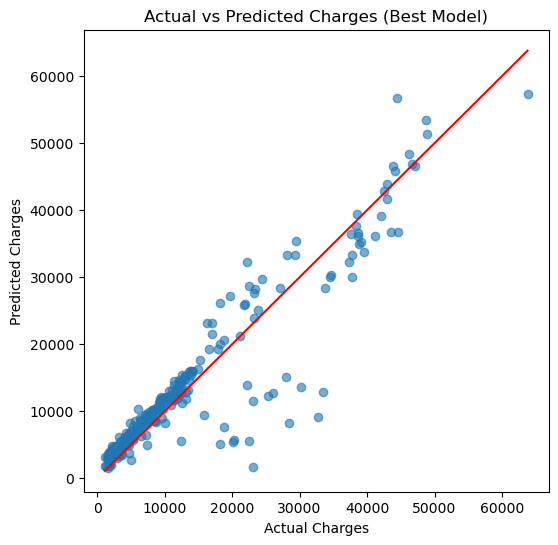

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Best Model)")
plt.show()


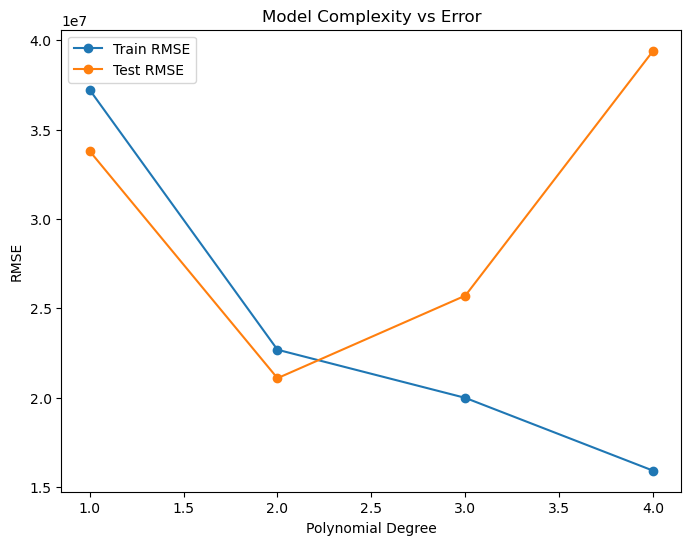

In [20]:
degrees = [1, 2, 3, 4]
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_p, y_train)

    train_pred = model.predict(X_train_p)
    test_pred = model.predict(X_test_p)

    train_errors.append(
        mean_squared_error(y_train, train_pred)
    )
    test_errors.append(
        mean_squared_error(y_test, test_pred)
    )

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Train RMSE')
plt.plot(degrees, test_errors, marker='o', label='Test RMSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Model Complexity vs Error")
plt.legend()
plt.show()
